# RUN5: 2018-05-27 UT Preliminary Analysis

In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from imaka.analysis import plot_stats
from astropy.table import Table
import numpy as np
from importlib import reload
from imaka.reduce.nights import reduce_2018_05_27 as redu

reload(redu)
reload(plot_stats)

root_dir = "/Volumes/DATA5/imaka/20180527/FLI/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Reduction

Fully reduce the data from 20180526 UT. Don't re-run this unless you really need to as it takes awhile. After you re-run the data reduction, please remember to load it back up to onaga.


Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0005_o_clean.fits


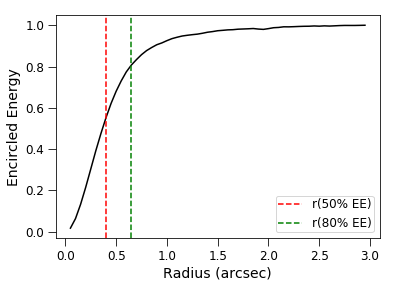

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0008_o_clean.fits


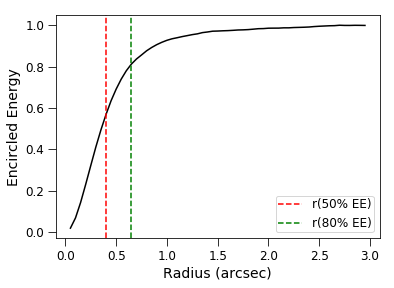

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0011_o_clean.fits


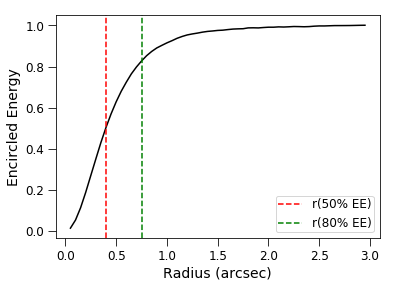

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0014_o_clean.fits


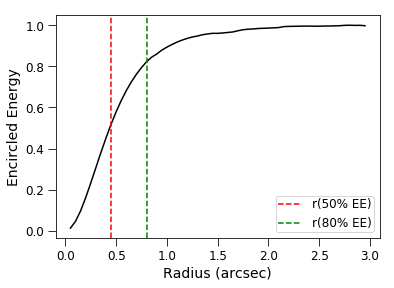

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0018_o_clean.fits


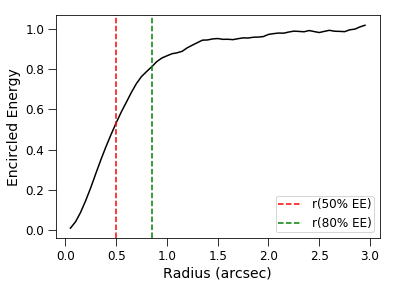

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0022_o_clean.fits


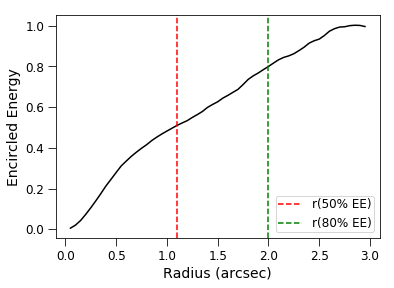

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0026_o_clean.fits


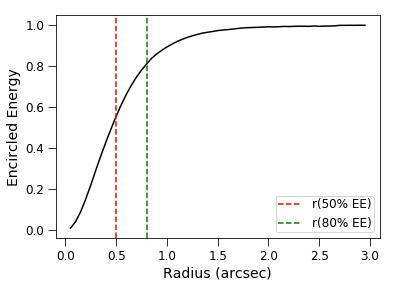

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0030_o_clean.fits


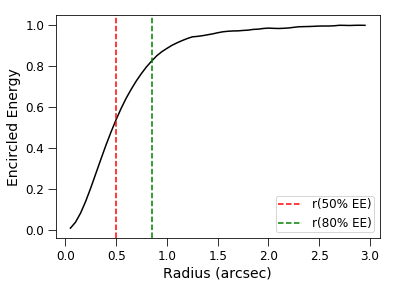

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0034_o_clean.fits


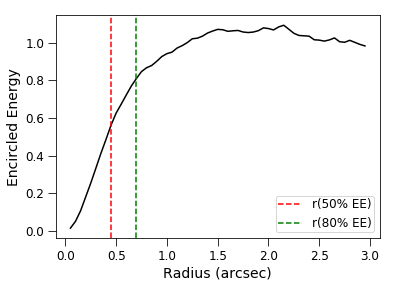

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0038_o_clean.fits


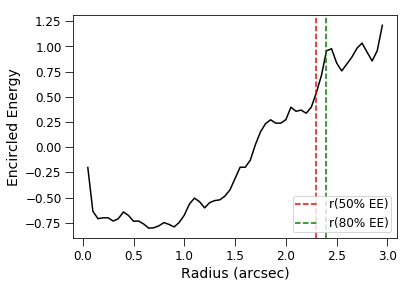

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0042_o_clean.fits


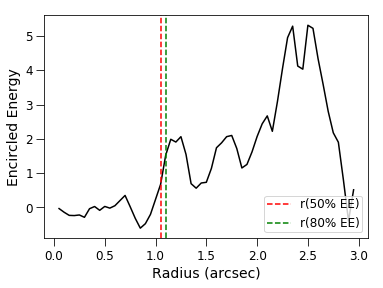

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0046_o_clean.fits


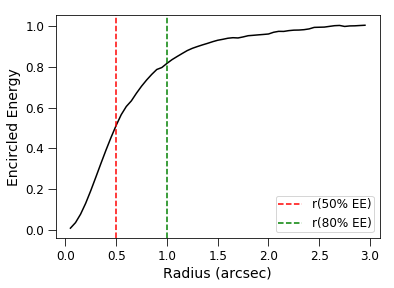

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0050_o_clean.fits


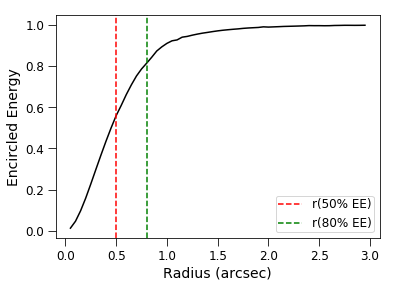

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0054_o_clean.fits


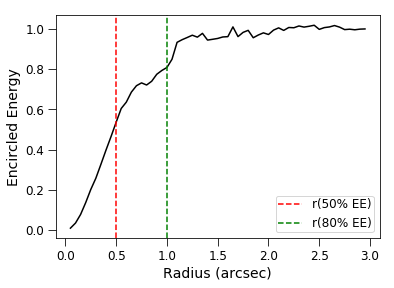

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0058_o_clean.fits


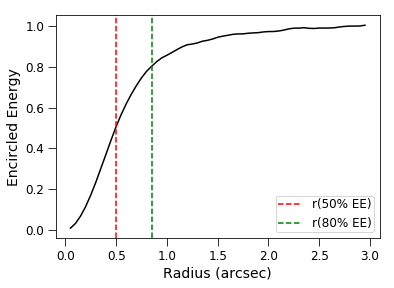

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0065_o_clean.fits


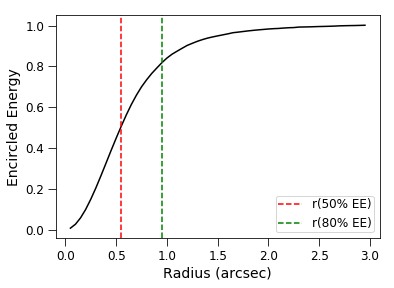

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0006_threewfs_small_c_clean.fits


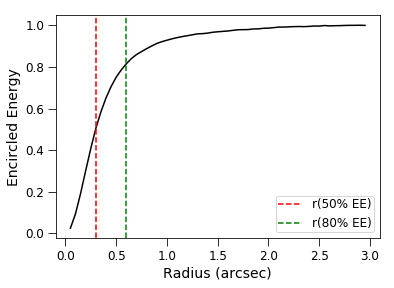

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0009_threewfs_small_c_clean.fits


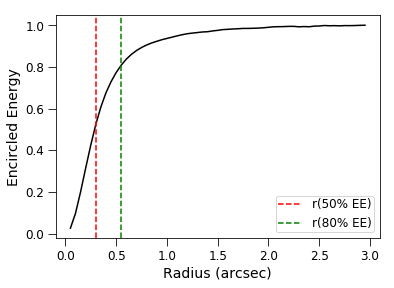

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0012_threewfs_small_c_clean.fits


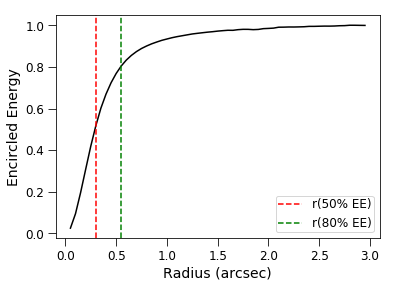

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0015_threewfs_small_c_clean.fits


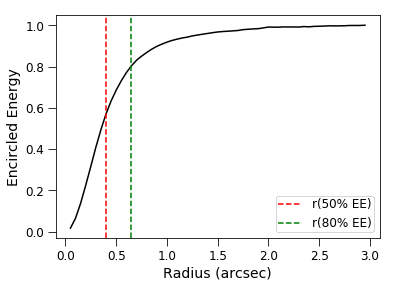

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0020_threewfs_small_c_clean.fits


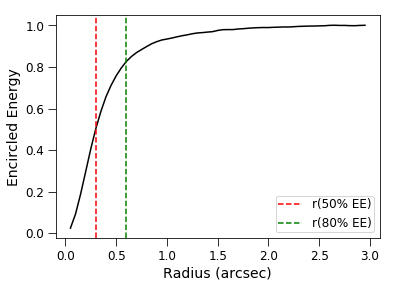

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0024_threewfs_small_c_clean.fits


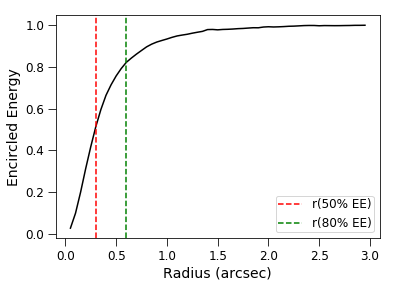

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0028_threewfs_small_c_clean.fits


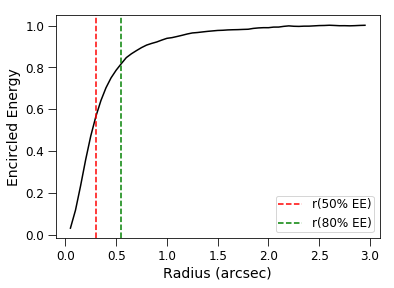

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0032_threewfs_small_c_clean.fits


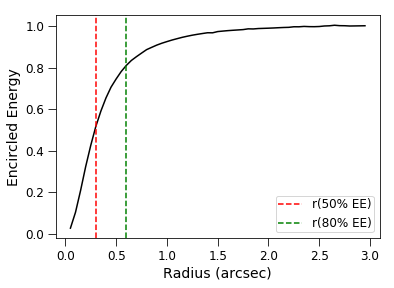

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0036_threewfs_small_c_clean.fits


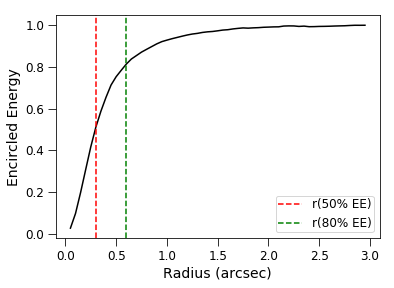

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0040_threewfs_small_c_clean.fits


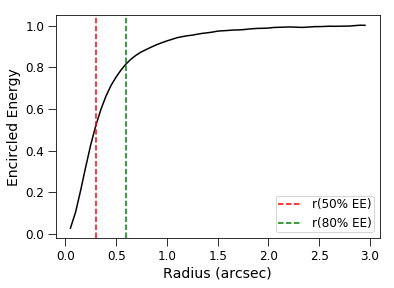

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0044_threewfs_small_c_clean.fits


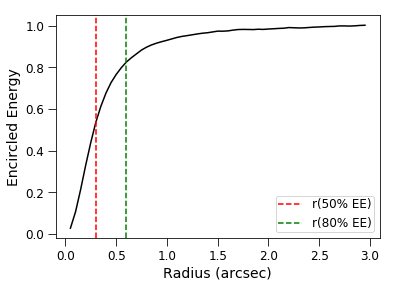

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0048_threewfs_small_c_clean.fits


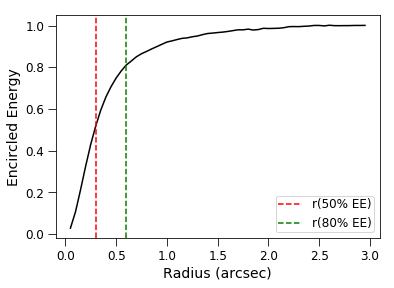

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0052_threewfs_small_c_clean.fits


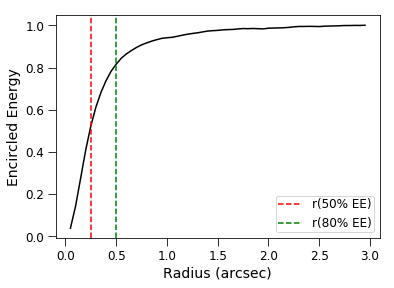

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0056_threewfs_small_c_clean.fits


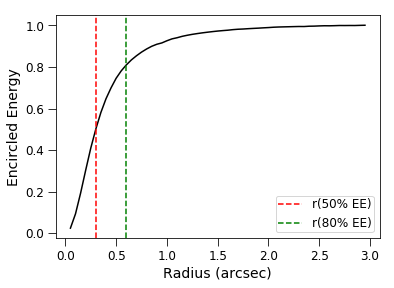

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0060_threewfs_small_c_clean.fits


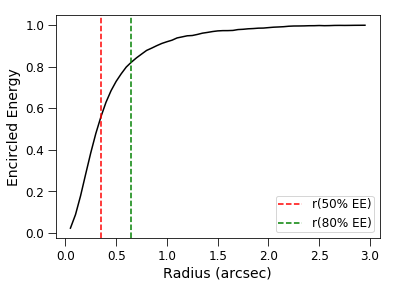

Working on image:  //Volumes/DATA5/imaka/20180526/FLI/reduce/FLD2/obj0064_threewfs_small_c_clean.fits


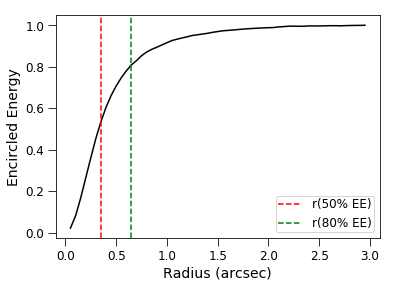

'"Make a stack of images for each mode and analyze stacks'

<Figure size 432x288 with 0 Axes>

In [7]:
"""Set the appropriate root directory for your machine"""
redu.root_dir = root_dir

""""Make sky and flat images and use them to reduce science images"""
#redu.make_sky()
#redu.make_flat()  # Manually copy over flat from 20180525/
#redu.reduce_FLD2()

""""Find stars in clean images and calculate stats"""
#redu.find_stars_FLD2()
redu.calc_star_stats()

""""Make a stack of images for each mode and analyze stacks"""
#redu.stack_FLD2()
#redu.analyze_stacks()

# Load MASS/DIMM Data

Fetch the MASS/DIMM data and load it into the stats table. First, we will fetch the MASS/DIMM data from the MKWC. This only needs to be done once (ever).
Then, populate the stats table with matching MASS/DIMM data.


In [9]:
from imaka.reduce import massdimm
import glob

massdimm_dir = root_dir + 'reduce/massdimm/'
massdimm.fetch_data('20180526', massdimm_dir)
stats_tables = glob.glob(root_dir + 'reduce/stats/stats*.fits')

for stats in stats_tables:
    if 'mdp.fits' not in stats:
        print('Adding MASS/DIMM to ' + stats)
        massdimm.append_mass_dimm(stats, massdimm_dir)
    else:
        print('Skipping ' + stats)

Saving MASS/DIMM data to directory:
/Volumes/DATA5/imaka/20180526/FLI/reduce/massdimm/
Adding MASS/DIMM to /Volumes/DATA5/imaka/20180526/FLI/reduce/stats/stats_closed_3WFS_S.fits
Adding MASS/DIMM to /Volumes/DATA5/imaka/20180526/FLI/reduce/stats/stats_open.fits


# Generate Plots

In [2]:
from astropy.table import Table
t = Table.read(root_dir + 'reduce/stats/stats_closed_3WFS_S_mdp.fits')
t.colnames;
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"

# FWHM and Seeing

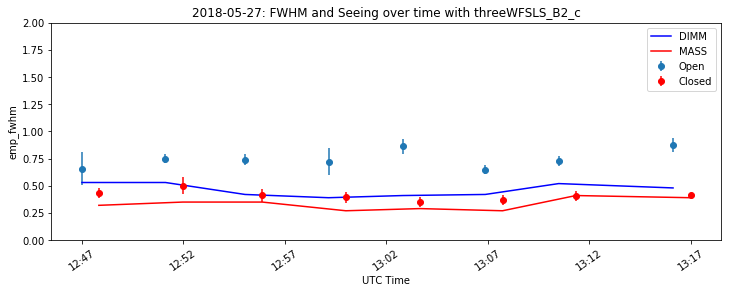

In [45]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file1 = stats_dir+ "stats_closed_threeWFSLS_B2_c_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFSLS_B2_c", plots_dir)

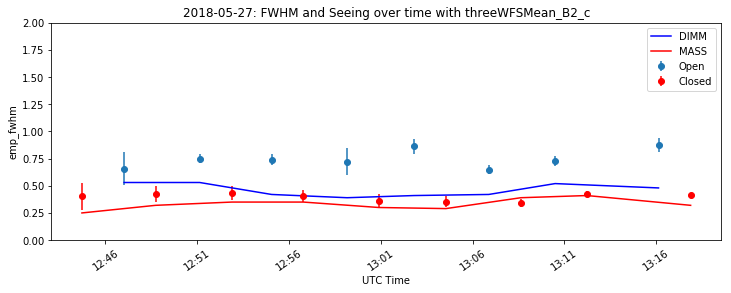

In [46]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file2 = stats_dir+ "stats_closed_threeWFSMean_B2_c_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file2, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFSMean_B2_c", plots_dir)

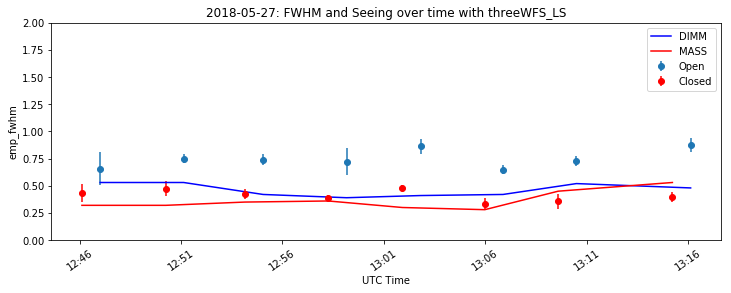

In [47]:
open_file = stats_dir +"stats_open_mdp.fits"
closed_file3 = stats_dir+ "stats_closed_threeWFS_LS_mdp.fits"
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file3, 'emp_fwhm', "2018-05-27: FWHM and Seeing over time with threeWFS_LS", plots_dir)

# PSF Comparisons

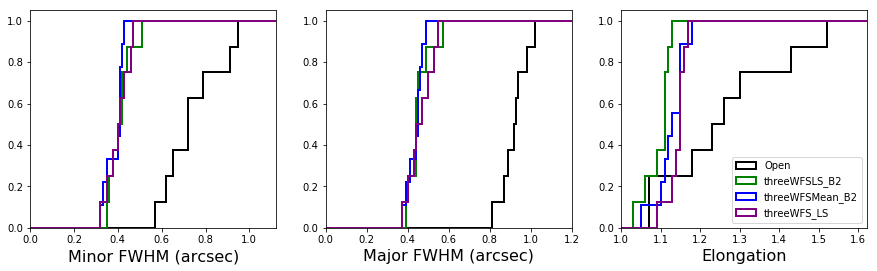

In [56]:
files = [open_file, closed_file1, closed_file2, closed_file3]
labels = ['Open', 'threeWFSLS_B2', 'threeWFSMean_B2', 'threeWFS_LS']
colors = ['k', 'g', 'b', 'purple']
plot_stats.comp_cdf(files, labels, colors)

# PSF Variability over Field of View

This preliminary analysis of PSF variability over the field of view shows no correlation between position on the field and either PSF size or elongation.  The plots below were generated from a stack of closed loop images, with each data point representing one star in the stacked image.